<a href="https://colab.research.google.com/github/Jasper-Hewitt/privatestuff/blob/main/predict_fake_news_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Init

In [ ]:
!pip install datasets
!pip install transformers
!pip install --upgrade xlrd
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 26.5 MB/s 
     |████████████████████████████████| 182 kB 71.0 MB/s 
     |████████████████████████████████| 212 kB 4.4 MB/s 
     |████████████████████████████████| 132 kB 76.7 MB/s 
     |████████████████████████████████| 127 kB 77.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 31.2 MB/s 
     |████████████████████████████████| 7.6 MB 69.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninst

In [ ]:
#import our model from huggingface
from transformers import RobertaTokenizer


number_classes = 2
model_tokenizer = "RobertaTokenizer"
model_classifier = "Jiabo/Roberta_fake_news"

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")


In [ ]:
model_classifier

'Jiabo/Roberta_fake_news'

# 1. load and clean data

In [ ]:
#insert new xlsx file here
#! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/df_sample.xlsx

In [ ]:
import pandas as pd

In [ ]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/gptfakenews.xlsx')

testing_pd = testing_pd[['news']]

In [ ]:
#dirty data
testing_pd

,news
0,"In a surprising turn of events, Twitter has be..."
1,A local man is seeking help for his addiction ...
2,"In a stunning turn of events, billionaire entr..."
3,Residents of a small town in rural America wer...
4,"In a shocking and devastating turn of events, ..."
5,"In a shocking turn of events, the New York Tim..."
6,"In a shocking turn of events, the Wall Street ..."
7,"In a shocking and tragic turn of events, the C..."


In [ ]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

# testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


# import re
# html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
# http_pattern = "http\S+"
# image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
# #title_pattern = "[【|《*】|》]"
# title_pattern_1 = "(?=【)(.*)(?<=】)"
# title_pattern_2 = "(?=《)(.*)(?<=》)"
# link_pattern="网页链接"
# span_pattern='<span.*?>(.+?)</span>'

# #replace with this block. Do some more research because it looks like some titles are still removed, like index 41
# testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
# testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
# testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
# testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
# testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

KeyError: ignored

In [ ]:
#delete empty rows
testing_pd = testing_pd[testing_pd['news'].str.len()>2]   
testing_pd = testing_pd[['news']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

,news
0,"In a surprising turn of events, Twitter has be..."
1,A local man is seeking help for his addiction ...
2,"In a stunning turn of events, billionaire entr..."
3,Residents of a small town in rural America wer...
4,"In a shocking and devastating turn of events, ..."
5,"In a shocking turn of events, the New York Tim..."
6,"In a shocking turn of events, the Wall Street ..."
7,"In a shocking and tragic turn of events, the C..."


## 1-2 Tokenization

In [ ]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)}

weibo_ds = DatasetDict(weibo_dict)

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = tokenizer #AutoTokenizer.from_pretrained(model_tokenizer)

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["news"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [ ]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

Downloading:   0%|          | 0.00/735 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-22-e1ee7db0da93>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
import numpy as np

#prediction results


In [ ]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: news. If news are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 8
  Batch size = 8


In [ ]:
pred

PredictionOutput(predictions=array([[-5.8227944,  4.976383 ],
       [-3.843763 ,  3.1402533],
       [ 5.9450583, -5.274349 ],
       [ 5.9350214, -5.239102 ],
       [-5.8228054,  4.8972793],
       [-5.5135407,  4.6484284],
       [-3.121418 ,  2.5767007],
       [ 5.944006 , -5.250277 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 3.2173, 'test_samples_per_second': 2.487, 'test_steps_per_second': 0.311})

In [ ]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [ ]:
#final table. Remember, 0 = negative, 1 = positive
testing_pd

,news,pred
0,"In a surprising turn of events, Twitter has be...",1
1,A local man is seeking help for his addiction ...,1
2,"In a stunning turn of events, billionaire entr...",0
3,Residents of a small town in rural America wer...,0
4,"In a shocking and devastating turn of events, ...",1
5,"In a shocking turn of events, the New York Tim...",1
6,"In a shocking turn of events, the Wall Street ...",1
7,"In a shocking and tragic turn of events, the C...",0


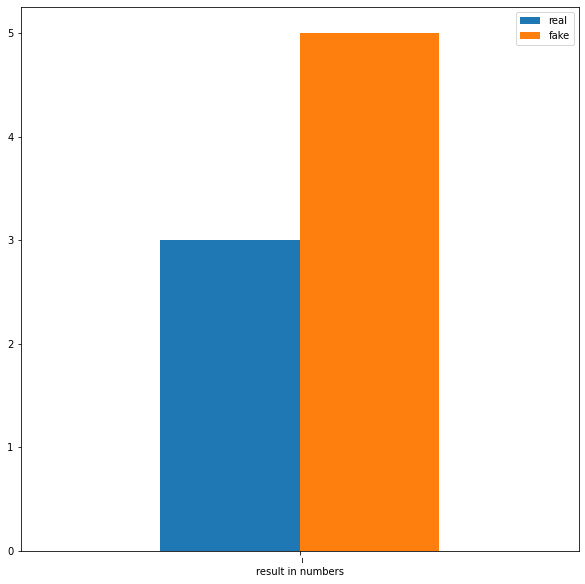

In [ ]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import pandas as pd
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'real':[count0], 'fake': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

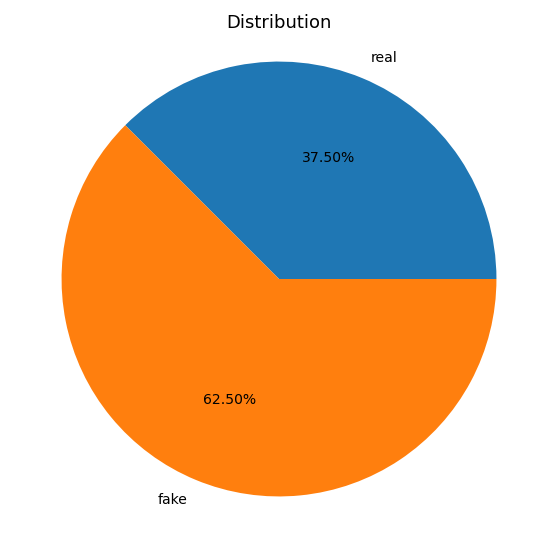

In [ ]:
#plot in percentage. Remember, 0 = negative, 1 = positive
def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['real', 'fake']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Distribution', fontsize=18, y=0.95);